In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [2]:
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix"

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [3]:
ls

data/  HelloGithub.ipynb  LICENSE  matrix_one/  README.md


In [6]:
ls data/

shoes_prices.csv


In [7]:
cd data/

/content/drive/My Drive/Colab Notebooks/dw_matrix/data


In [0]:
df = pd.read_csv('data/shoes_prices.csv', low_memory=False)

In [12]:
df.shape

(19387, 48)

In [13]:
ls

data/  HelloGithub.ipynb  LICENSE  matrix_one/  README.md


In [23]:
df_usd = df[df.prices_currency == 'USD'].copy()
df_usd.shape

(18524, 48)

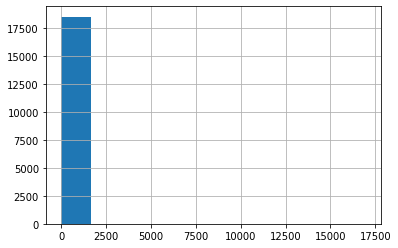

In [24]:
df_usd['prices_amountmin'] = df_usd.prices_amountmin.astype(np.float)
df_usd['prices_amountmin'].hist()

In [26]:
df_usd.head()

,id,asins,brand,categories,colors,count,dateadded,dateupdated,descriptions,dimension,ean,features,flavors,imageurls,isbn,keys,manufacturer,manufacturernumber,merchants,name,prices_amountmin,prices_amountmax,prices_availability,prices_color,prices_condition,prices_count,prices_currency,prices_dateadded,prices_dateseen,prices_flavor,prices_issale,prices_merchant,prices_offer,prices_returnpolicy,prices_shipping,prices_size,prices_source,prices_sourceurls,prices_warranty,quantities,reviews,sizes,skus,sourceurls,upc,vin,websiteids,weight
0,AVpfHrJ6ilAPnD_xVXOI,NaN,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",NaN,6.993020e+11,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...",NaN,https://i5.walmartimages.com/asr/13ac3d61-003c...,NaN,"josmo/8190wnavy75,699302044036,0699302044036",NaN,8190-W-NAVY-7.5,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""name"":""...","Josmo 8190 Plain Infant Walking Shoes, Navy - ...",39.89,39.89,NaN,NaN,NaN,NaN,USD,2016-11-07T00:45:12Z,2016-11-05T00:00:00Z,NaN,true,NaN,REDUCED USD 12.10,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,699302044036,NaN,NaN,NaN
1,AVpfHrJ6ilAPnD_xVXOI,NaN,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",NaN,6.993020e+11,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...",NaN,https://i5.walmartimages.com/asr/13ac3d61-003c...,NaN,"josmo/8190wnavy75,699302044036,0699302044036",NaN,8190-W-NAVY-7.5,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""name"":""...","Josmo 8190 Plain Infant Walking Shoes, Navy - ...",51.99,51.99,NaN,NaN,new,NaN,USD,2016-11-07T00:45:12Z,2016-11-05T00:00:00Z,NaN,false,UnbeatableSale - Walmart.com,REDUCED USD 12.10,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,699302044036,NaN,NaN,NaN
2,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",NaN,http://i5.walmartimages.com/dfw/dce07b8c-5844/...,NaN,servusbyhoneywell/zsr101blmlg,NaN,ZSR101BLMLG,"[{""dateSeen"":[""2016-06-14T04:29:57Z""],""name"":""...",Servus By Honeywell Shoe Studs Zsr101blmlg,40.02,40.02,NaN,NaN,new,NaN,USD,2016-06-14T04:29:57Z,2016-03-08T00:00:00Z,NaN,false,SIM Supply Inc - Walmart.com,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN
3,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",NaN,http://i5.walmartimages.com/dfw/dce07b8c-5844/...,NaN,servusbyhoneywell/zsr101blmlg,NaN,ZSR101BLMLG,"[{""dateSeen"":[""2016-06-14T04:29:57Z""],""name"":""...",Servus By Honeywell Shoe Studs Zsr101blmlg,50.31,50.31,NaN,NaN,new,NaN,USD,2016-06-14T04:29:57Z,2015-11-30T00:00:00Z,NaN,false,SIM Supply Inc - Walmart.com,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN
4,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",NaN,http://i5.walmartimages.com/dfw/dce07b8c-5844/...,NaN,servusbyhoneywell/zsr101blmlg,NaN,ZSR101BLMLG,"[{""dateSeen"":[""2016-06-14T04:29:5

In [27]:
df_usd.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [0]:
mean_price = np.mean(df['prices_amountmin'])

In [42]:
mean_price

93.53952188183217

In [43]:
y_true = df['prices_amountmin']
y_true.shape[0]

18280

In [44]:
y_true = df['prices_amountmin']
y_pred = [mean_price] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

63.968341227870624

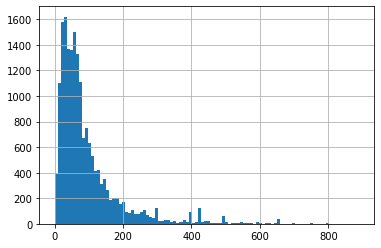

In [45]:
df['prices_amountmin'].hist(bins = 100)

In [46]:
np.log(0 +1)

0.0

In [47]:
np.log1p(0)

0.0

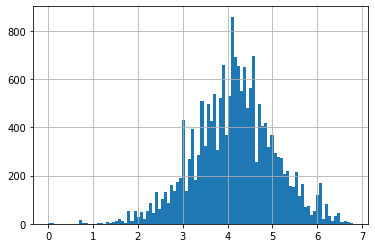

In [49]:
np.log1p(df['prices_amountmin']).hist(bins = 100)

In [50]:
y_true = df['prices_amountmin']
y_pred = [np.median(y_true)] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.01120240700219

In [57]:
y_true = df['prices_amountmin']
price_log_mean = np.expm1(np.mean(np.log1p(y_true)))
y_pred = [price_log_mean] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.03539547661041

In [54]:
np.exp(np.mean(np.log1p(y_true))) - 1

62.92811169273113

In [56]:
np.expm1(np.mean(np.log1p(y_true)))

62.92811169273113

In [0]:
df['brand_cat'] = df['brand'].factorize()[0]

In [61]:
df['brand_cat']

0           0
1           0
2           1
3           1
4           1
         ... 
18275    1855
18276     307
18277     411
18278     411
18279     411
Name: brand_cat, Length: 18280, dtype: int64

In [65]:
feats = ['brand_cat']
X = df[feats].values
y = df.prices_amountmin.values

model = DecisionTreeRegressor(max_depth=5)

scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
np.mean(scores), np.std(scores)


(-58.38655694633361, 4.223555478221712)

In [0]:
def run_model(feats):
  X = df[feats].values
  y = df.prices_amountmin.values
  
  model = DecisionTreeRegressor(max_depth=5)
  
  scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)



In [67]:
run_model(['brand_cat'])


(-58.38655694633361, 4.223555478221712)

In [0]:
df['manufacturer_cat'] = df['manufacturer'].factorize()[0]

In [69]:
run_model(['manufacturer_cat'])


(-63.133649278023746, 3.394307434888982)

In [71]:
run_model(['manufacturer_cat', 'brand_cat'])

(-58.53930419908595, 4.311223231615446)